In [1]:
### Importing All Importance Liabrarys
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras import layers, models
import pickle


In [2]:
### Read the CSV file 
df=pd.read_csv(r'seattle-weather.csv')

In [3]:
# to view the top 5 rows
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
# to view the bottom 5 rows
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [5]:
## check the shape of DataFrame
df.shape

(1461, 6)

In [6]:
## Cheking the null value present or not in each columns
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
## Cheking the null value present or not in DataFrame
df.isnull().sum().sum()

0

In [8]:
## Drop is used for removing the specific column in the DataFrame
df.drop('date',axis=1,inplace=True)

In [9]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [10]:
df.tail()

,precipitation,temp_max,temp_min,wind,weather
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun
1460,0.0,5.6,-2.1,3.5,sun


In [11]:
## Vslues count show how many number of time specific feature is repeted in DataFrame
df.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [12]:
## Label encoding is used for to convert categorical Data into Numerical Data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

In [13]:
df.weather.value_counts()

weather
2    641
4    640
1    101
0     53
3     26
Name: count, dtype: int64

In [14]:
## SMOTE is used for Balance the Unbalance Data 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

#Preprocess Data for Machine Learning Development
X = df.drop(['weather'], axis = 1)
y = df['weather']


over_strategy = {0 : 1000, 1 : 1000, 2 : 1000, 3 : 1000, 4 : 2000}
under_strategy = {0 : 1000, 1 : 1000, 2 : 1000, 3 : 1000, 4 : 2000}

oversample = SMOTE(sampling_strategy = over_strategy)
undersample = RandomUnderSampler(sampling_strategy = under_strategy)

X_final,y = oversample.fit_resample(X,y)
X_final,y = undersample.fit_resample(X_final, y)

## Splitting the Data Into Training And Testing
X_train,X_test,y_train,y_test = train_test_split(X_final,y,random_state = 10, test_size = 0.2)

In [15]:
X=df.drop('weather',axis=1)
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [16]:
y=df['weather']
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int32

In [17]:
X_train

,precipitation,temp_max,temp_min,wind
650,1.000000,14.400000,8.900000,2.200000
779,15.200000,8.900000,5.000000,6.200000
3684,22.499427,6.748763,3.217713,5.521334
433,0.000000,12.800000,1.100000,1.300000
3767,17.713946,8.300000,0.911546,6.086710
...,...,...,...,...
3126,0.000000,14.006399,8.900000,1.946001
4504,23.209196,8.761894,4.377808,5.640584
2748,0.000000,15.742800,8.157200,2.414399
5449,0.000000,21.100000,14.282438,3.111611


In [18]:
y_train

650     2
779     2
3684    3
433     1
3767    3
       ..
3126    1
4504    3
2748    1
5449    4
2429    1
Name: weather, Length: 4800, dtype: int32

In [19]:
X_test

,precipitation,temp_max,temp_min,wind
2682,0.000000,15.247450,3.851650,1.849850
234,0.000000,22.200000,13.300000,2.300000
2845,0.000000,19.991944,9.408056,2.781203
17,19.800000,0.000000,-2.800000,5.000000
5641,0.000000,24.125890,9.549515,2.275081
...,...,...,...,...
422,0.500000,8.900000,3.900000,3.800000
4766,0.000000,21.048700,13.300000,3.630780
3954,20.553568,1.803181,-1.158298,5.134566
2612,0.000000,14.400000,4.400000,2.295010


In [20]:
y_test

2682    1
234     4
2845    1
17      3
5641    4
       ..
422     2
4766    4
3954    3
2612    1
4144    3
Name: weather, Length: 1200, dtype: int32

### Decision Tree

In [21]:
## Decision Tree Model Building 
dt = DecisionTreeClassifier(random_state=12)
dt = dt.fit(X_train,y_train)     # Fit Training Data
y_pred = dt.predict(X_test)
acc_dt = accuracy_score(y_test,y_pred)
# PS_dt = precision_score(y_test,y_pred)
# RS_dt = recall_score(y_test,y_pred)
# F1S_dt = f1_score(y_test,y_pred)
cls_dt = classification_report(y_test,y_pred)
CM_dt = confusion_matrix(y_test,y_pred)

print(f"acurracy = {acc_dt}")
# print(f"precision_score = {PS_dt}")
# print(f"recall_score = {RS_dt}")
# print(f"f1_score = {F1S_dt}")
print(f"classification_report =\n {cls_dt}")
print(f"confusion_matrix =\n {CM_dt}")

acurracy = 0.8566666666666667
classification_report =
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       213
           1       0.79      0.73      0.76       215
           2       0.96      0.90      0.93       197
           3       0.96      0.99      0.98       198
           4       0.81      0.88      0.84       377

    accuracy                           0.86      1200
   macro avg       0.87      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200

confusion_matrix =
 [[167  16   1   0  29]
 [ 19 157   1   0  38]
 [  1   2 177   8   9]
 [  0   0   1 197   0]
 [ 17  25   5   0 330]]


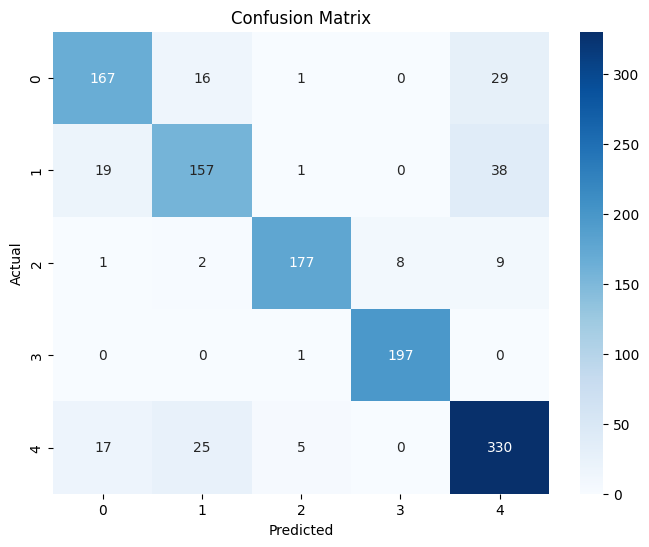

In [22]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(CM_dt, annot=True, fmt='d', cmap='Blues')  #, xticklabels=df.target_names, yticklabels=df.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
with open('DT_model.pkl','wb') as fp:
    pickle.dump(dt,fp)

### GaussianNB 

In [24]:
gnb = GaussianNB()
# np.random.seed(10)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test,y_pred)
cls_gnb = classification_report(y_test,y_pred)
CM_gnb = confusion_matrix(y_test,y_pred)

print(f"acurracy = {acc_gnb}")
print(f"classification_report =\n {cls_gnb}")
print(f"confusion_matrix =\n {CM_gnb}")

acurracy = 0.6458333333333334
classification_report =
               precision    recall  f1-score   support

           0       0.47      0.29      0.36       213
           1       0.57      0.25      0.34       215
           2       0.97      0.81      0.88       197
           3       0.89      0.97      0.93       198
           4       0.52      0.81      0.63       377

    accuracy                           0.65      1200
   macro avg       0.68      0.63      0.63      1200
weighted avg       0.65      0.65      0.62      1200

confusion_matrix =
 [[ 62  12   0   0 139]
 [ 24  53   0   0 138]
 [  3   1 160  24   9]
 [  0   0   5 193   0]
 [ 43  27   0   0 307]]


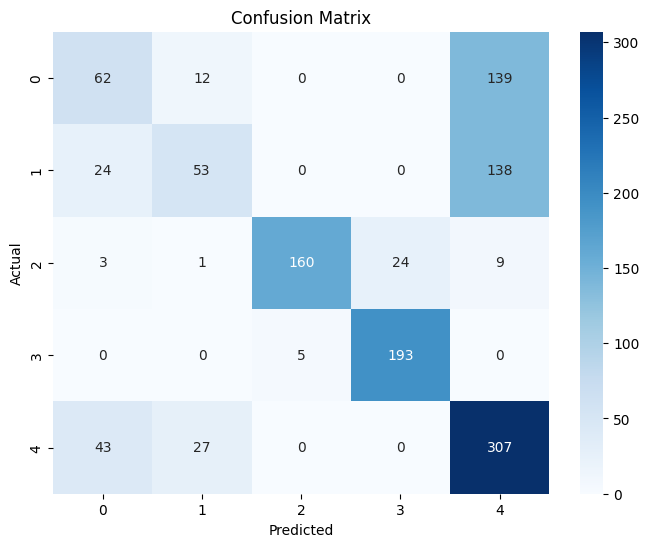

In [25]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(CM_gnb, annot=True, fmt='d', cmap='Blues')  #, xticklabels=df.target_names, yticklabels=df.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test,y_pred)
cls_knn = classification_report(y_test,y_pred)
CM_knn = confusion_matrix(y_test,y_pred)

print(f"acurracy = {acc_knn}")
print(f"classification_report =\n {cls_knn}")
print(f"confusion_matrix =\n {CM_knn}")

acurracy = 0.8541666666666666
classification_report =
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       213
           1       0.79      0.83      0.81       215
           2       0.97      0.78      0.87       197
           3       0.94      0.99      0.96       198
           4       0.83      0.86      0.85       377

    accuracy                           0.85      1200
   macro avg       0.87      0.85      0.86      1200
weighted avg       0.86      0.85      0.85      1200

confusion_matrix =
 [[173  13   0   0  27]
 [ 11 178   0   0  26]
 [  7  11 154  13  12]
 [  0   2   0 196   0]
 [ 29  20   4   0 324]]


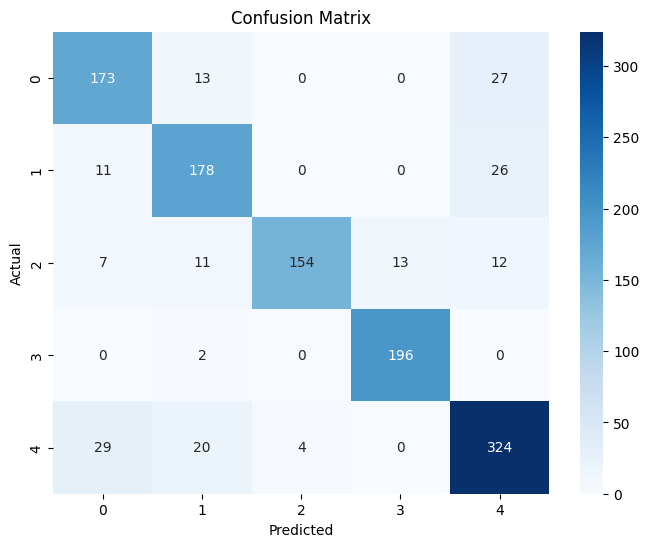

In [27]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(CM_knn, annot=True, fmt='d', cmap='Blues')  #, xticklabels=df.target_names, yticklabels=df.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
with open('KNN_model.pkl','wb') as fp:
    pickle.dump(knn,fp)

### Random Forest

In [29]:
rf = RandomForestClassifier(n_estimators=52)
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred)
cls_rf = classification_report(y_test,y_pred)
CM_rf = confusion_matrix(y_test,y_pred)

print(f"acurracy = {acc_rf}")
print(f"classification_report =\n {cls_rf}")
print(f"confusion_matrix =\n {CM_rf}")

acurracy = 0.8958333333333334
classification_report =
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       213
           1       0.88      0.79      0.83       215
           2       0.99      0.90      0.94       197
           3       0.97      0.99      0.98       198
           4       0.83      0.95      0.89       377

    accuracy                           0.90      1200
   macro avg       0.91      0.89      0.90      1200
weighted avg       0.90      0.90      0.90      1200

confusion_matrix =
 [[173  14   0   0  26]
 [  9 170   0   0  36]
 [  2   1 177   7  10]
 [  0   0   1 197   0]
 [ 10   9   0   0 358]]


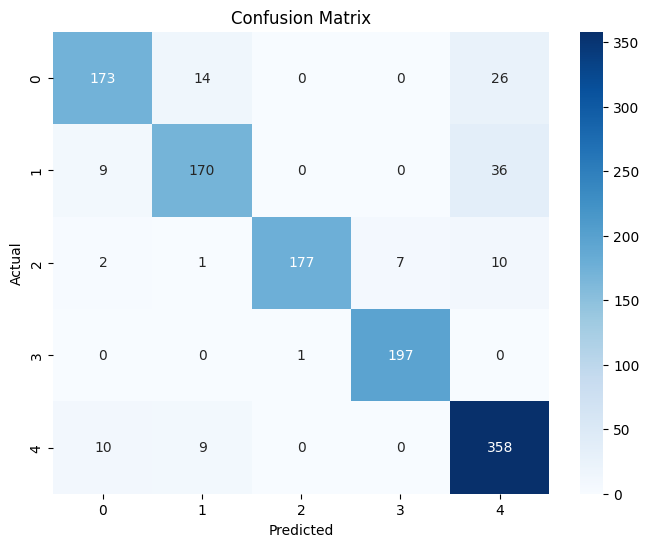

In [30]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(CM_rf, annot=True, fmt='d', cmap='Blues')  #, xticklabels=df.target_names, yticklabels=df.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
with open('RF_model.pkl','wb') as fp:
    pickle.dump(rf,fp)

### LogisticRegression

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc_lr=accuracy_score(y_test,y_pred)
cls_lr = classification_report(y_test,y_pred)
CM_lr = confusion_matrix(y_test,y_pred)

print(f"acurracy = {acc_lr}")
print(f"classification_report =\n {cls_lr}")
print(f"confusion_matrix =\n {CM_lr}")

acurracy = 0.6458333333333334
classification_report =
               precision    recall  f1-score   support

           0       0.61      0.22      0.32       213
           1       0.50      0.19      0.27       215
           2       0.96      0.83      0.89       197
           3       0.89      0.96      0.93       198
           4       0.51      0.89      0.65       377

    accuracy                           0.65      1200
   macro avg       0.69      0.62      0.61      1200
weighted avg       0.66      0.65      0.61      1200

confusion_matrix =
 [[ 46  17   0   0 150]
 [ 12  40   0   0 163]
 [  2   2 163  17  13]
 [  0   0   7 191   0]
 [ 15  21   0   6 335]]


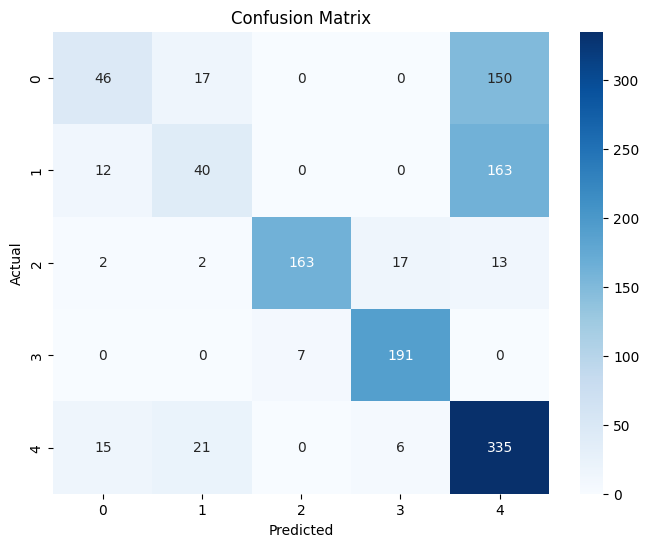

In [33]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(CM_lr, annot=True, fmt='d', cmap='Blues')  #, xticklabels=df.target_names, yticklabels=df.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
with open('LR_model.pkl','wb') as fp:
    pickle.dump(lr,fp)

### AdaBoost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [36]:
y_pred=adb.predict(X_test)
acc_adb=accuracy_score(y_test,y_pred)
cls_adb = classification_report(y_test,y_pred)
CM_adb = confusion_matrix(y_test,y_pred)

print(f"acurracy = {acc_adb}")
print(f"classification_report =\n {cls_adb}")
print(f"confusion_matrix =\n {CM_adb}")

acurracy = 0.555
classification_report =
               precision    recall  f1-score   support

           0       0.30      0.25      0.27       213
           1       0.42      0.04      0.07       215
           2       0.69      0.93      0.79       197
           3       0.98      0.59      0.73       198
           4       0.49      0.81      0.61       377

    accuracy                           0.56      1200
   macro avg       0.58      0.52      0.50      1200
weighted avg       0.56      0.56      0.50      1200

confusion_matrix =
 [[ 53   0   0   0 160]
 [ 58   8   0   0 149]
 [  3   0 183   2   9]
 [  0   0  82 116   0]
 [ 60  11   0   0 306]]


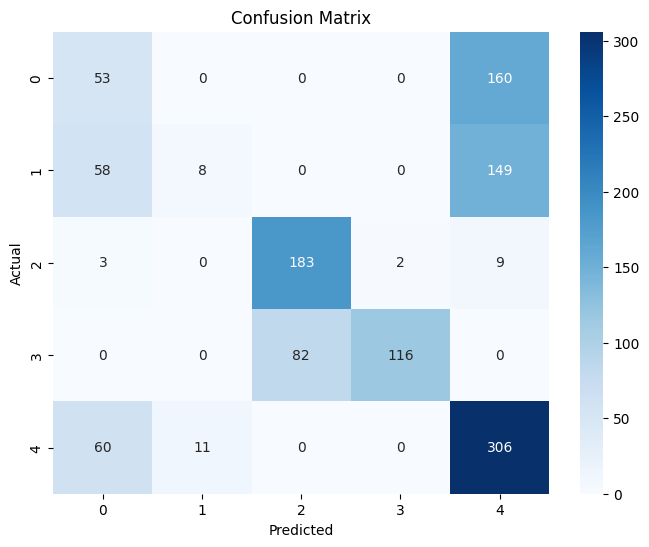

In [37]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(CM_adb, annot=True, fmt='d', cmap='Blues')  #, xticklabels=df.target_names, yticklabels=df.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### CNN

In [38]:

# Check the shape of the input data
print(X_train.shape)  # Check the shape of X_train to ensure it matches your expectations

# Define the CNN architecture
model_cnn = models.Sequential()

# Add fully connected layers for classification
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dense(5, activation='softmax'))  # 5 classes for classification

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))




(4800, 4)
Epoch 1/100
150/150 [==============================] - 1s 5ms/step - loss: 1.1250 - accuracy: 0.5417 - val_loss: 0.9419 - val_accuracy: 0.5742
Epoch 2/100
150/150 [==============================] - 0s 3ms/step - loss: 0.8884 - accuracy: 0.6121 - val_loss: 0.9059 - val_accuracy: 0.5908
Epoch 3/100
150/150 [==============================] - 0s 3ms/step - loss: 0.8504 - accuracy: 0.6290 - val_loss: 0.8631 - val_accuracy: 0.6050
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.8278 - accuracy: 0.6404 - val_loss: 0.8676 - val_accuracy: 0.6183
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.8050 - accuracy: 0.6492 - val_loss: 0.8275 - val_accuracy: 0.6283
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.7842 - accuracy: 0.6602 - val_loss: 0.8242 - val_accuracy: 0.6517
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.7807 - accuracy: 0.6625 - val_loss: 0.7857 - val_accura

In [39]:
# Evaluating the model accuracy
y_pred = model_cnn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Get the index of the highest probability
acc_cnn = accuracy_score(y_test, y_pred_classes)
cls_cnn = classification_report(y_test, y_pred_classes)
CM_cnn = confusion_matrix(y_test, y_pred_classes)
print(f"Accuracy = {acc_cnn}")
print(f"classification_report =\n {cls_cnn}")
print(f"confusion_matrix =\n {CM_cnn}")

38/38 [==============================] - 0s 2ms/step
Accuracy = 0.7183333333333334
classification_report =
               precision    recall  f1-score   support

           0       0.53      0.60      0.56       213
           1       0.53      0.34      0.41       215
           2       1.00      0.89      0.94       197
           3       0.97      1.00      0.98       198
           4       0.65      0.76      0.70       377

    accuracy                           0.72      1200
   macro avg       0.74      0.72      0.72      1200
weighted avg       0.72      0.72      0.71      1200

confusion_matrix =
 [[128  32   0   0  53]
 [ 52  73   0   0  90]
 [  1   3 176   7  10]
 [  0   0   0 198   0]
 [ 60  30   0   0 287]]


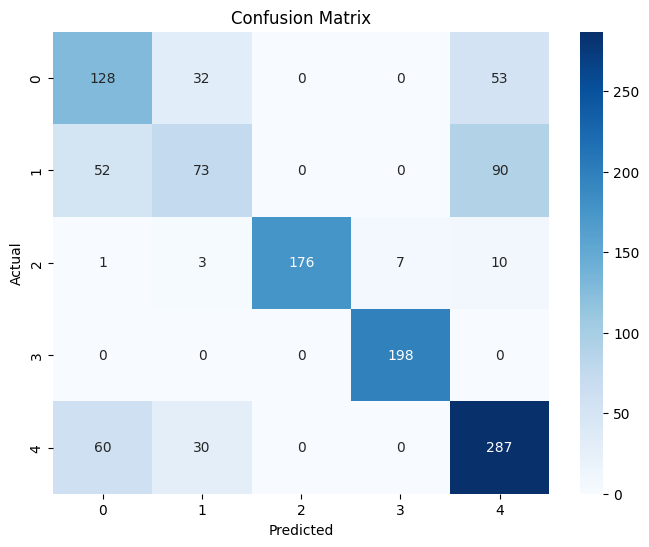

In [40]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(CM_cnn, annot=True, fmt='d', cmap='Blues')  #, xticklabels=df.target_names, yticklabels=df.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
with open('CNN_model.pkl','wb') as fp:
    pickle.dump(model_cnn,fp)

In [42]:
with open('CNN_model.pkl','rb') as fp:
    mod=pickle.load(fp)

In [43]:
y_pred = mod.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Get the index of the highest probability
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy}")

38/38 [==============================] - 0s 2ms/step
Accuracy: 0.7183333333333334


### Prediction 

In [44]:
abc=[0.0,	27.8,	13.3,	3.3]
result=lr.predict([abc])
result=result[0]
if result==0:
    print("Drizzle")
elif result==1:
    print("Fog")
elif result==2:
    print("Rain")
elif result==3:
    print("Snow")
else:
    print("Sun")

Sun


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
abc=[1.5,	8.9,	3.3,	3.8]
result=dt.predict([abc])
result=result[0]
if result==0:
    print("Drizzle")
elif result==1:
    print("Fog")
elif result==2:
    print("Rain")
elif result==3:
    print("Snow")
else:
    print("Sun")

Rain


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [46]:
abc=[0.0,	19.4,	9.4,	2.0]
result=dt.predict([abc])
print(result)
result=result[0]
if result==0:
    print("Drizzle")
elif result==1:
    print("Fog")
elif result==2:
    print("Rain")
elif result==3:
    print("Snow")
else:
    print("Sun")

[0]
Drizzle


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [47]:
abc=[0.000000,	20.979252,	9.442617,	1.307103]
result=dt.predict([abc])
result=result[0]
if result==0:
    print("Drizzle")
elif result==1:
    print("Fog")
elif result==2:
    print("Rain")
elif result==3:
    print("Snow")
else:
    print("Sun")

Fog


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [48]:
abc=[3.558850,	4.298997,	-4.243887,	5.288777]
result=dt.predict([abc])
result=result[0]
if result==0:
    print("Drizzle")
elif result==1:
    print("Fog")
elif result==2:
    print("Rain")
elif result==3:
    print("Snow")
else:
    print("Sun")

Snow


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [49]:
abc=[3.558850,	4.298997,	-4.243887,	5.288777]
result=model_cnn.predict([abc]).argmax(axis=-1)
result=result[0]
if result==0:
    print("Drizzle")
elif result==1:
    print("Fog")
elif result==2:
    print("Rain")
elif result==3:
    print("Snow")
else:
    print("Sun")

1/1 [==============================] - 0s 82ms/step
Snow


### Graph

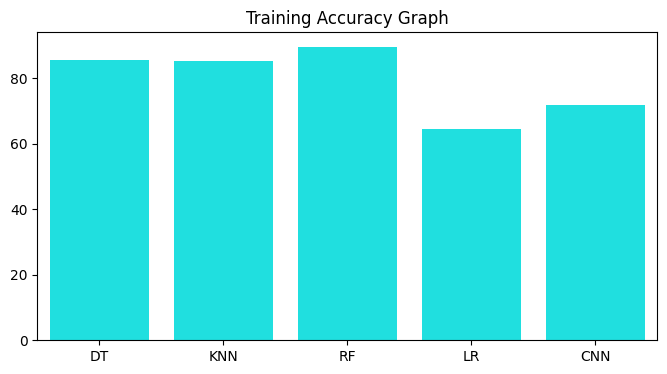

In [50]:
Algorithm = ['DT', 'KNN', 'RF', "LR", 'CNN']
Accuracy =  [acc_dt*100, acc_knn*100, acc_rf*100, acc_lr*100, acc_cnn*100]

plt.figure(figsize=(8,4))
sns.barplot(x = Algorithm, y = Accuracy, color='cyan')
plt.title('Training Accuracy Graph')
plt.show()